K=1, Accuracy=0.9667
K=2, Accuracy=1.0000
K=3, Accuracy=1.0000
K=4, Accuracy=1.0000
K=5, Accuracy=1.0000
K=6, Accuracy=1.0000
K=7, Accuracy=1.0000
K=8, Accuracy=1.0000
K=9, Accuracy=1.0000
K=10, Accuracy=1.0000


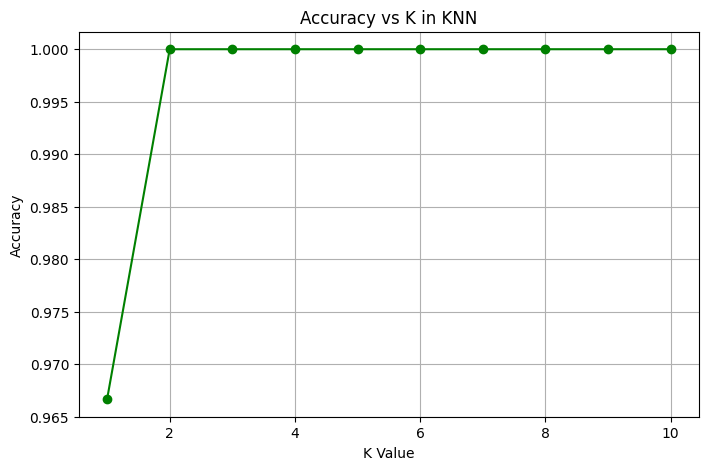


✅ Best K = 2

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Iris.csv")
df.drop(columns=['Id'], inplace=True)
df.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

X = df.drop('Species', axis=1)
y = df['Species']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracies = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"\n✅ Best K = {best_k}")
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
